In [ ]:
# Bağlantıyı kurma ve gerekli paketleri yükleme
from google.colab import drive
drive.mount('/content/drive')

zip_adres = "/content/drive/My Drive/archive.zip"
!cp "{zip_adres}" .

!unzip -q archive.zip
#!rm archive.zip

Mounted at /content/drive
cp: cannot stat '/content/drive/My Drive/archive.zip': No such file or directory
unzip:  cannot find or open archive.zip, archive.zip.zip or archive.zip.ZIP.


In [ ]:
!pip install vit-keras
!pip install tensorflow_addons

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from vit_keras import vit
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef

# Mixed precision kullanımı
from tensorflow.keras import mixed_precision
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 883.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 3.1 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
# Test ve train veri setlerinin yolları
test_dir = '/content/drive/MyDrive/MAKİNE ÖĞRENMESİ VERİLER/test'
train_dir = '/content/drive/MyDrive/MAKİNE ÖĞRENMESİ VERİLER/train'
categories = ['Çamurlu Zemin', 'Karstik Zemin', 'Kumlu Zemin', 'Sulak Zemin']

# ImageDataGenerator ile veri yükleme ve artırma
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Eğitim ve doğrulama setlerini ayırma
)

# Eğitim veri seti
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,  # Daha büyük batch size kullanarak eğitim süresini hızlandırma
    class_mode='sparse',
    subset='training'
)

# Doğrulama veri seti
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

# Test veri seti
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

Found 3864 images belonging to 4 classes.
Found 963 images belonging to 4 classes.
Found 1506 images belonging to 4 classes.


In [ ]:
vit_model = vit.vit_b32(
    image_size=224,
    activation='softmax',
    pretrained=True,
    include_top=True,
    pretrained_top=False,
    classes=4
)

vit_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

callbacks = [
    tf.keras.callbacks.ProgbarLogger(count_mode='steps')
]

# Batch size'ı artırma
batch_size = 64

# Daha az epoch kullanma
epochs = 3

history_vit = vit_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    verbose=1,
    callbacks=callbacks,
    batch_size=batch_size
)


In [ ]:
vit_model = vit.vit_b32(
    image_size=224,
    activation='softmax',
    pretrained=True,
    include_top=True,
    pretrained_top=False,
    classes=4
)

vit_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

callbacks = [
    tf.keras.callbacks.ProgbarLogger(count_mode='steps')
]

# Batch size'ı artırma
batch_size = 64

# Daha az epoch kullanma
epochs = 3

history_vit = vit_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    verbose=1,
    callbacks=callbacks,
    batch_size=batch_size
)


353253686/353253686 [==============================] - 6s 0us/step


/usr/local/lib/python3.10/dist-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 12, 12 to 7, 7
  warnings.warn(


Epoch 1/3
121/121 [==============================] - 1352s 11s/step - loss: 0.9336 - accuracy: 0.6271 - val_loss: 0.8546 - val_accuracy: 0.6750
Epoch 2/3
121/121 [==============================] - 110s 912ms/step - loss: 0.4928 - accuracy: 0.8072 - val_loss: 0.8973 - val_accuracy: 0.7103
Epoch 3/3
121/121 [==============================] - 112s 924ms/step - loss: 0.3307 - accuracy: 0.8696 - val_loss: 0.8891 - val_accuracy: 0.7331


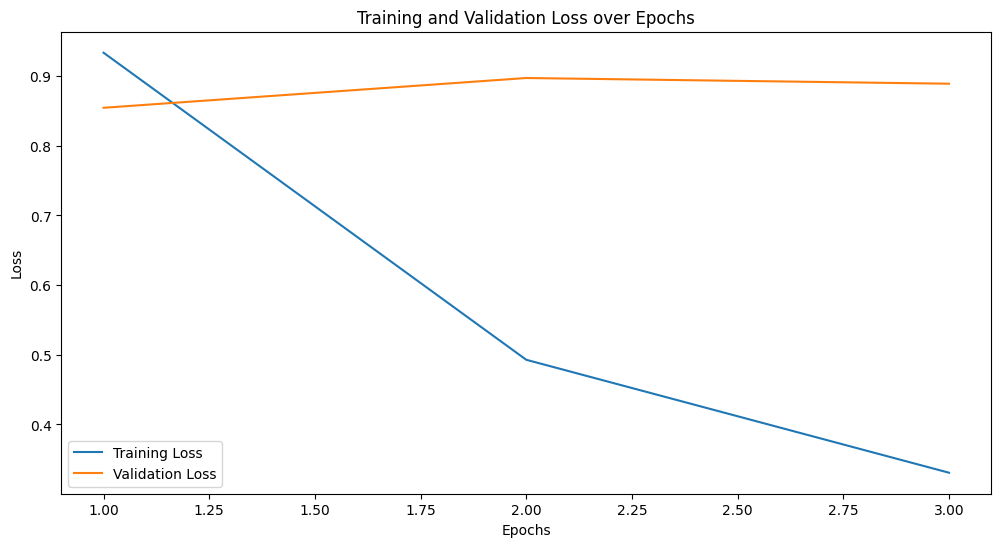

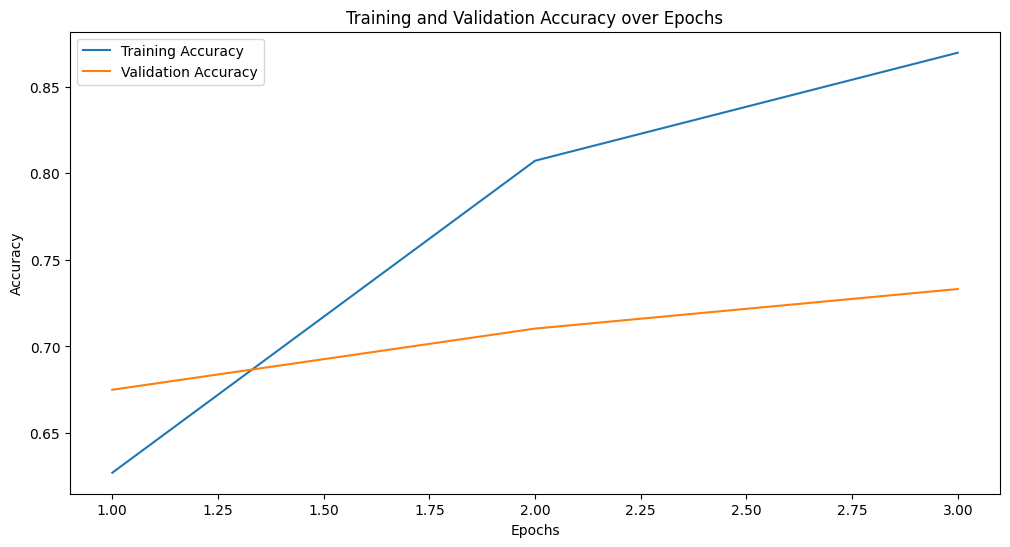

In [ ]:
train_loss = history_vit.history['loss']
val_loss = history_vit.history['val_loss']
train_acc = history_vit.history['accuracy']
val_acc = history_vit.history['val_accuracy']

# Epoch sayısına göre loss grafiği
plt.figure(figsize=(12, 6))
plt.plot(range(1, epochs + 1), train_loss, label='Training Loss')
plt.plot(range(1, epochs + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

# Epoch sayısına göre accuracy grafiği
plt.figure(figsize=(12, 6))
plt.plot(range(1, epochs + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, epochs + 1), val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()